Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [242]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

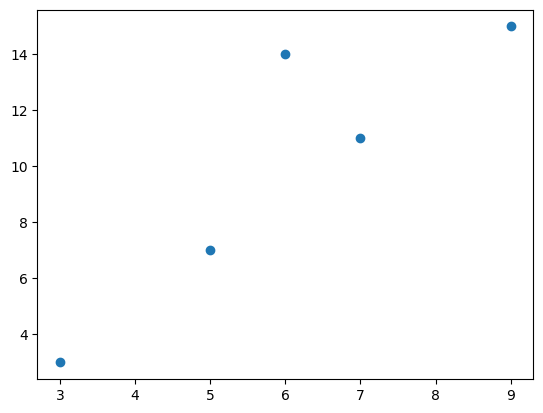

In [187]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [188]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [147]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


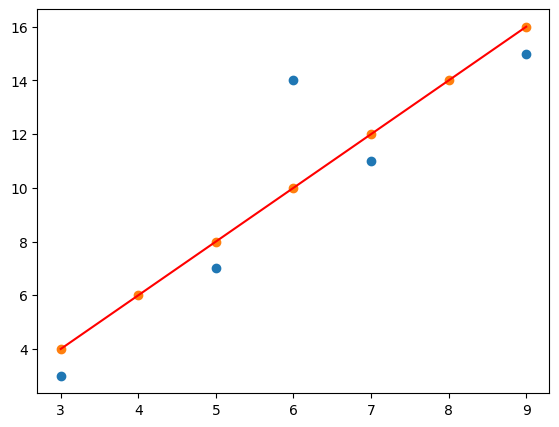

In [148]:
#Изобразим на графике исходные данные и прогнозы
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
ax.scatter(x_space, Y_pred)

In [189]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [190]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


---


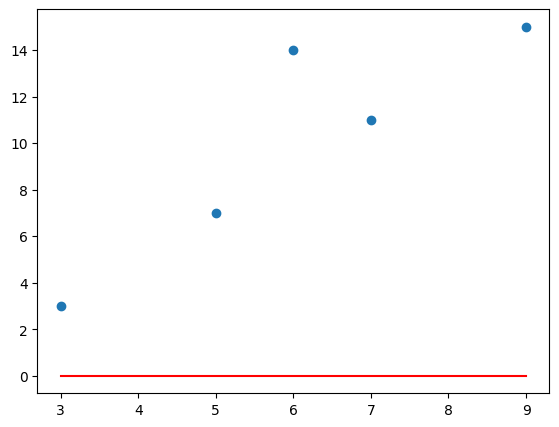

In [191]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


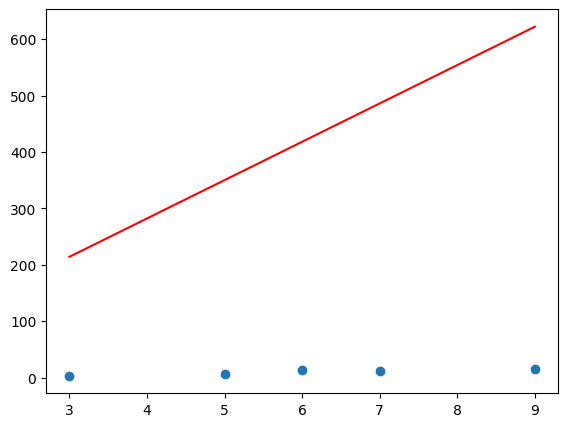

In [192]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [225]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [230]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)
print(regr.predict(1))

nan


nan
nan
nan
nan
nan
MSE после градиентного спуска:  nan


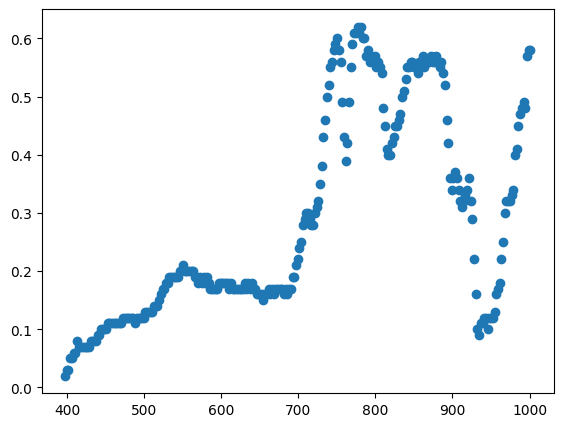

In [231]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

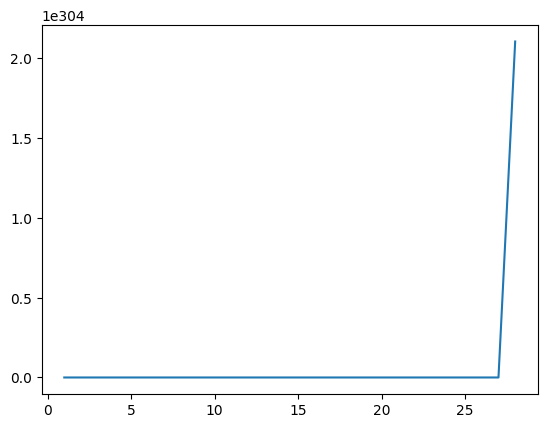

In [232]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [233]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.1903709155046345


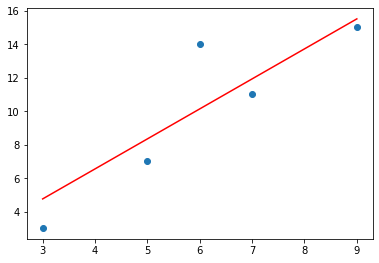

In [171]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

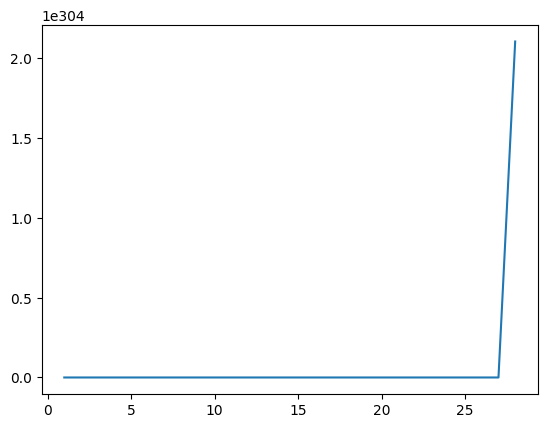

In [237]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  nan


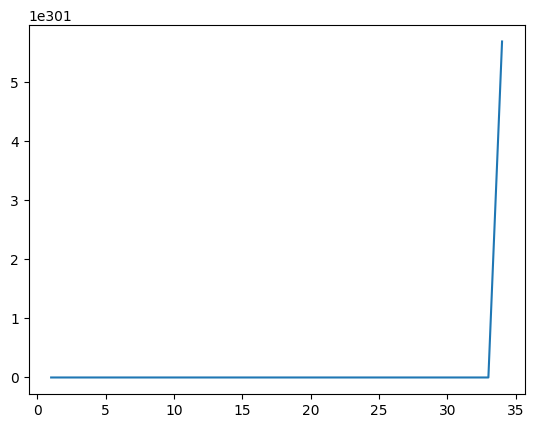

In [241]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ...,
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

---

Загрузите файл Гиперспектр кукурузы.csv (с помощью pd.read_csv).

1. Вычислите аналитическим путем оценки коэффициентов парной линейной регрессии и постройте ее график.
2. Найдите оценки параметров модели парной лиенйной регрессии с использованием метода градиентного спуска. Постройте график.
3. Оцените качество построенных моделей сравнив на графике обучающую выборку и прогнозы.


### 1

In [238]:
gipers = pd.read_csv(r"C:\Work_Projects\ML\corn.csv", sep=';').astype(float)
gipers.head()
Y = gipers['Spectr']
x = gipers['wavelength']

In [235]:
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -0.1834278267811973  +  0.0006681550262486285 * x


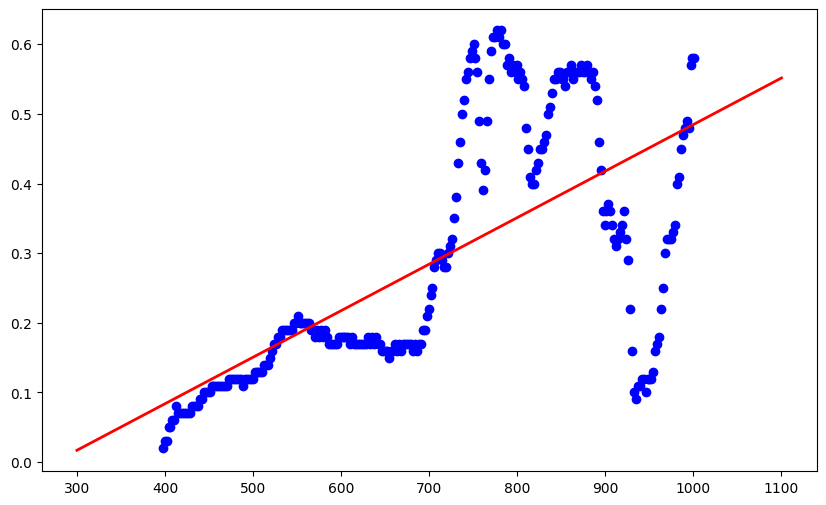

In [236]:
# Генерация значений x для прогноза
x_space = np.linspace(300, 1100)

# Прогнозируемые значения Y для x_space
Y_pred = a0 + a1 * x_space

# Построение графика
plt.figure(figsize=(10, 6))

# График исходных данных
plt.scatter(x, Y, color='blue', label='Исходные данные')

# График линии линейной регрессии
plt.plot(x_space, Y_pred, color='red', linewidth=2, label='Линейная регрессия')

### 2

In [240]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [224]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
print(f"x: {x} \ny: {Y}")
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)
print(regr.predict(0))


x: 0       397.32
1       399.54
2       401.76
3       403.98
4       406.20
        ...   
268     992.28
269     994.50
270     996.72
271     998.94
272    1001.16
Name: wavelength, Length: 273, dtype: float64 
y: 0      0.02
1      0.03
2      0.03
3      0.05
4      0.05
       ... 
268    0.49
269    0.48
270    0.57
271    0.58
272    0.58
Name: Spectr, Length: 273, dtype: float64
nan


In [209]:
# Вывод MSE после выполнения градиентного спуска
print("Final MSE:", regr.MSE(x, Y))

# # Построение графика прогнозов
# x_space = np.linspace(x.min(), x.max(), 100)  # Создаем пространство значений для прогноза
# Y_pred = regr.predict(x_space)

# plt.figure(figsize=(10, 6))

# # График исходных данных
# plt.scatter(x, Y, color='blue', label='Исходные данные')

# # График линии линейной регрессии
# plt.plot(x_space, Y_pred, color='red', linewidth=2, label='Линейная регрессия')

Final MSE: nan


nan
nan
nan
nan
nan
MSE после градиентного спуска:  nan


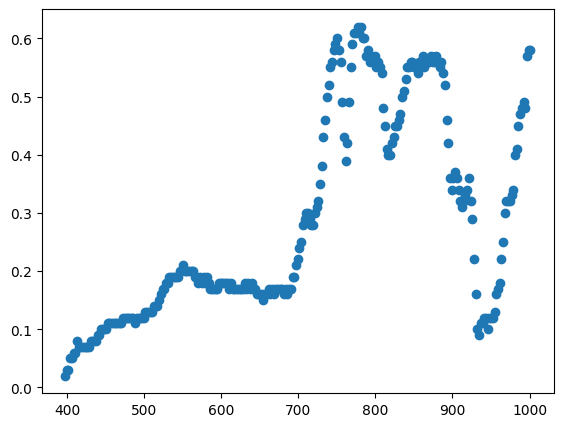

In [203]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(1))
print(regr.predict(50))
print(regr.predict(200))
print(regr.predict(500))
print(regr.predict(1000))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')